<a href="https://colab.research.google.com/github/deepakri201/NLSTNatureSciData/blob/main/UsageNotes/parseSEGandSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download, read, and visualize the SEG and SR files

In this notebook, we demonstrate how to download, read, and visualize DICOM SEG and SR files from multiple collections using pydicom and highdicom.

Deepa Krishnaswamy

Brigham and Women's Hospital

December 2025


https://viewer.imaging.datacommons.cancer.gov/v3/viewer/?StudyInstanceUIDs=1.2.840.113654.2.55.319584529633200325232732612493200878677

# Install highdicom from github

In [1]:
!git clone https://github.com/imagingdatacommons/highdicom ~/highdicom

Cloning into '/root/highdicom'...
remote: Enumerating objects: 8544, done.
remote: Counting objects: 100% (2237/2237), done.
remote: Compressing objects: 100% (392/392), done.
remote: Total 8544 (delta 1981), reused 1889 (delta 1810), pack-reused 6307 (from 2)
Receiving objects: 100% (8544/8544), 7.10 MiB | 5.79 MiB/s, done.
Resolving deltas: 100% (5631/5631), done.


In [2]:
!pip install ~/highdicom

Processing /root/highdicom
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.8 MB/s eta 0:00:00
  Created wheel for highdicom: filename=highdicom-0.27.0-py3-none-any.whl size=1110643 sha256=c0b090f8a486625bf8736b66c3a6195b8ce882c18276acd979a72665a29a2476
  Stored in directory: /tmp/pip-ephem-wheel-cache-sfyg1jlr/wheels/e1/2a/ca/e605fe591961d04f0a82d0ca4d8593aaeeba598f4a9c806a09
Successfully built highdicom


# Parameterization

In [3]:
#@title Enter your Project ID here
# initialize this variable with your Google Cloud Project ID!
project_name = "idc-external-018" #@param {type:"string"}

import os
os.environ["GCP_PROJECT_ID"] = project_name

!gcloud config set project $project_name

from google.colab import auth
auth.authenticate_user()

Updated property [core/project].


# Environment setup

In [4]:
!pip install idc-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: duckdb
    Found existing installation: duckdb 1.3.2
    Uninstalling duckdb-1.3.2:
      Successfully uninstalled duckdb-1.3.2


In [5]:
from idc_index import IDCClient

idc_client = IDCClient.client()

In [6]:
!pip install pydicom
import pydicom

In [7]:
# DCMQI - to convert nifti to DICOM Segmentation object
!wget https://github.com/QIICR/dcmqi/releases/download/v1.4.0/dcmqi-1.4.0-linux.tar.gz
!tar zxvf dcmqi-1.4.0-linux.tar.gz
!cp dcmqi-1.4.0-linux/bin/* /usr/local/bin/

--2025-12-12 16:26:27--  https://github.com/QIICR/dcmqi/releases/download/v1.4.0/dcmqi-1.4.0-linux.tar.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/50675718/915cb14a-48f5-4288-9a5f-bfbcc67daf43?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-12T17%3A25%3A33Z&rscd=attachment%3B+filename%3Ddcmqi-1.4.0-linux.tar.gz&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-12T16%3A25%3A17Z&ske=2025-12-12T17%3A25%3A33Z&sks=b&skv=2018-11-09&sig=dWuyMqRzqmkCI7BsAg9t9kyTbMUTckTuTLygIfmZQSw%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NTU1ODU4NywibmJmIjoxNzY1NTU2Nzg3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjd

In [8]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 9.9 MB/s eta 0:00:00


In [26]:
import os
import sys
import time

from google.cloud import bigquery
from google.cloud import storage

import numpy as np
import pandas as pd
import nibabel as nib
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import json
from pathlib import Path

import pydicom
from pydicom.uid import generate_uid
from pydicom.filereader import dcmread
from pydicom.sr.codedict import codes

In [10]:
from highdicom.sr.content import (
    FindingSite,
    ImageRegion,
    ImageRegion3D,
    SourceImageForRegion
)

from highdicom.sr.enum import GraphicTypeValues3D
from highdicom.sr.enum import GraphicTypeValues
from highdicom.sr.sop import Comprehensive3DSR, ComprehensiveSR
from highdicom.sr.templates import (
    DeviceObserverIdentifyingAttributes,
    Measurement,
    MeasurementProperties,
    MeasurementReport,
    ObservationContext,
    ObserverContext,
    PersonObserverIdentifyingAttributes,
    PlanarROIMeasurementsAndQualitativeEvaluations,
    RelationshipTypeValues,
    TrackingIdentifier,
    QualitativeEvaluation
)

from highdicom.sr import CodedConcept

from highdicom.sr import ImageLibrary
from highdicom.sr import ImageLibraryEntryDescriptors
from highdicom.sr.value_types import Code
from highdicom.sr.value_types import ContentItem
from highdicom.sr import PixelOriginInterpretationValues

import logging
logger = logging.getLogger("highdicom.sr.sop")
logger.setLevel(logging.INFO)

In [11]:
import highdicom as hd
hd.__version__

'0.27.0'

In [12]:
pydicom.__version__

'3.0.1'

# Download, read, and visualize a NLSTSeg lesion (DICOM SEG) and a NLST-Sybil bounding box (DICOM SR)

We download a series that has both a lesion segmentation from NLSTSeg and a bounding box from NLST-Sybil. We download the files, read/parse them, and visualize the segmentations and the bounding boxes.

## Query to find a series that has both a lesion SEG file and bounding box SR file

In [13]:
client_bq = bigquery.Client(project=project_name)

query = f"""
      WITH nlstseg AS (
        SELECT DISTINCT
          PatientID,
          StudyInstanceUID,
          SeriesInstanceUID,
          ReferencedSeriesSequence[SAFE_OFFSET(0)].SeriesInstanceUID AS ReferencedSeriesInstanceUID,
          series_gcs_url
        FROM
          `bigquery-public-data.idc_v23.dicom_all`
        WHERE
          analysis_result_id = 'NLSTSeg' AND
          Modality = 'SEG'
      )
      SELECT DISTINCT
        dicom_all.PatientID,
        dicom_all.StudyInstanceUID,
        dicom_all.SeriesInstanceUID AS NLSTSybil_SeriesInstanceUID,
        nlstseg.SeriesInstanceUID AS NLSTSeg_SeriesInstanceUID,
        nlstseg.ReferencedSeriesInstanceUID AS CT_SeriesInstanceUID
      FROM
        `bigquery-public-data.idc_v23.dicom_all` as dicom_all
      JOIN
        nlstseg
      ON
        nlstseg.ReferencedSeriesInstanceUID = dicom_all.CurrentRequestedProcedureEvidenceSequence[OFFSET(0)].ReferencedSeriesSequence[OFFSET(0)].SeriesInstanceUID
      WHERE
        analysis_result_id = 'NLST-Sybil' AND
        Modality = 'SR'
      ORDER BY
        dicom_all.PatientID,
        dicom_all.StudyInstanceUID
      """
df_overlap = client_bq.query(query).to_dataframe()


In [14]:
# Pick the first one

CT_SeriesInstanceUID = df_overlap['CT_SeriesInstanceUID'].values[0]
NLSTSeg_SeriesInstanceUID = df_overlap['NLSTSeg_SeriesInstanceUID'].values[0]
NLSTSybil_SeriesInstanceUID = df_overlap['NLSTSybil_SeriesInstanceUID'].values[0]

print('CT_SeriesInstanceUID: ' + str(CT_SeriesInstanceUID))
print('NLSTSeg_SeriesInstanceUID: ' + str(NLSTSeg_SeriesInstanceUID))
print('NLSTSybil_SeriesInstanceUID: ' + str(NLSTSybil_SeriesInstanceUID))

CT_SeriesInstanceUID: 1.2.840.113654.2.55.157089410086487452104998883963678895145
NLSTSeg_SeriesInstanceUID: 1.2.276.0.7230010.3.1.3.481037312.9241.1761239683.605348
NLSTSybil_SeriesInstanceUID: 1.2.826.0.1.3680043.8.498.80137012981695130585146174873222514935


## Download the CT series, SEG file, and SR file

In [15]:
# Download the above files using idc-index

dicom_directory = "/content/ct"
if not os.path.isdir(dicom_directory):
  os.mkdir(dicom_directory)

# Download the CT series
idc_client.download_from_selection(
    seriesInstanceUID=CT_SeriesInstanceUID,
    downloadDir=dicom_directory,
    dirTemplate='',
    quiet=True
)

# Download the NLSTSeg series
idc_client.download_from_selection(
    seriesInstanceUID=NLSTSeg_SeriesInstanceUID,
    downloadDir="/content/nlstseg/",
    dirTemplate='',
    quiet=True
)

# Download the NLST-Sybil series
idc_client.download_from_selection(
    seriesInstanceUID=NLSTSybil_SeriesInstanceUID,
    downloadDir="/content/nlstsybil",
    dirTemplate='',
    quiet=True
)

NLSTSeg_filename = os.path.join("/content/nlstseg/", os.listdir("/content/nlstseg")[0])
NLSTSybil_filename = os.path.join("/content/nlstsybil", os.listdir("/content/nlstsybil")[0])
print('NLSTSeg_filename: ' + str(NLSTSeg_filename))
print('NLSTSybil_filename: ' + str(NLSTSybil_filename))

NLSTSeg_filename: /content/nlstseg/e8b52f93-d553-48b4-91bf-f85e4ffa9716.dcm
NLSTSybil_filename: /content/nlstsybil/0ce38fda-68d5-4b0c-bd9e-46503f4df831.dcm


## Read the SEG file using either dcmqi or highdicom

In [16]:
# Read the SEG file using dcmqi

# This will save a single nifti file with multiple lesions if present
if not os.path.isdir("/content/seg_output"):
  os.mkdir("/content/seg_output")
!segimage2itkimage -t "nii" --outputDirectory "/content/seg_output" --inputDICOM $NLSTSeg_filename  --mergeSegments

# Let's print what's in the json file
json_filename = "/content/seg_output/meta.json"
with open(json_filename, 'r') as file:
  seg_data = json.load(file)
seg_data_pretty = json.dumps(seg_data, indent=2)
print(seg_data_pretty)


dcmqi repository URL: https://github.com/QIICR/dcmqi revision: 4e5b700 tag: v1.4.0
Loading DICOM SEG file /content/nlstseg/e8b52f93-d553-48b4-91bf-f85e4ffa9716.dcm
Row direction: 1 0 0
Col direction: 0 1 0
Z direction: 0 0 1
Total frames: 8
Total frames with unique IPP: 8
Total overlapping frames: 0
Origin: [-165, -188.9, -59.275]
Slice extent: 17.5
Slice spacing: 2.5
Image Orientation Patient set to : 1, 0, 0, 0, 1, 0
Identified 1 groups of non-overlapping segments
Writing itk image to /content/seg_output/1.nii.gz ... done
{
  "BodyPartExamined": "CHEST",
  "ClinicalTrialCoordinatingCenterName": "dcmqi",
  "ClinicalTrialSeriesID": "0",
  "ClinicalTrialTimePointID": "1",
  "ContentCreatorName": "IDC",
  "InstanceNumber": "1",
  "SeriesDescription": "NLSTSeg Segmentation of Series: 2",
  "SeriesNumber": "200",
  "segmentAttributes": [
    [
      {
        "AnatomicRegionSequence": {
          "CodeMeaning": "Upper lobe of right lung",
          "CodeValue": "42400003",
          "Codin

In [17]:
# Alternatively, we could read the SEG file using highdicom

# Can also read the SEG file using highdicom
seg = hd.seg.segread(NLSTSeg_filename)

# Get the source images from this segmentation
sop_uid_list = []
for study_uid, series_uid, sop_uid in seg.get_source_image_uids():
  sop_uid_list.append(sop_uid)

print('sop_uid_list: ' + str(sop_uid_list))
print('num slices: ' + str(len(sop_uid_list)))

# To access information about each slice, we access the PerFrameFunctionalGroups
pffg = seg.PerFrameFunctionalGroupsSequence


sop_uid_list: ['1.2.840.113654.2.55.79807002501189556016815093690055116407', '1.2.840.113654.2.55.150524768450870076284857386421811635601', '1.2.840.113654.2.55.329016620609349905483416622109835461223', '1.2.840.113654.2.55.217293709007807468863759928478669198267', '1.2.840.113654.2.55.198513696741609135961568689862185791404', '1.2.840.113654.2.55.54509889643105648795703277789324570007', '1.2.840.113654.2.55.276814871669395874499567832117201833111', '1.2.840.113654.2.55.239433257233267093782268204440467400584']
num slices: 8


In [18]:
# Here we can see the Derivation Image Sequence, which provides the referenced SOPInstanceUID
pffg[0]

(0008,9124)  Derivation Image Sequence  1 item(s) ---- 
   (0008,2112)  Source Image Sequence  1 item(s) ---- 
      (0008,1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008,1155) Referenced SOP Instance UID         UI: 1.2.840.113654.2.55.79807002501189556016815093690055116407
      (0040,A170)  Purpose of Reference Code Sequence  1 item(s) ---- 
         (0008,0100) Code Value                          SH: '121322'
         (0008,0102) Coding Scheme Designator            SH: 'DCM'
         (0008,0104) Code Meaning                        LO: 'Source image for image processing operation'
         ---------
      ---------
   (0008,9215)  Derivation Code Sequence  1 item(s) ---- 
      (0008,0100) Code Value                          SH: '113076'
      (0008,0102) Coding Scheme Designator            SH: 'DCM'
      (0008,0104) Code Meaning                        LO: 'Segmentation'
      ---------
   ---------
(0020,9111)  Frame Content Sequence  1 item(s) ---- 
   

In [19]:
# To access the underlying pixel data of a particular slice, we can do the following
mask_data = seg.pixel_array
print('mask_data: ' + str(mask_data.shape))

# Note, if we had more than 1 lesion, we would have to match the index into pffg with the index to pixel_array, and would have to check the ReferencedSegmentNumber

mask_data: (8, 512, 512)


## Read the SR file using highdicom

In [20]:
sr = hd.sr.srread(NLSTSybil_filename)

# Dataframe to hold the SR info
df_sr = pd.DataFrame()

# Get various UIDs
PatientID = sr.PatientID
StudyInstanceUID = sr.StudyInstanceUID
SeriesInstanceUID = sr.SeriesInstanceUID
referenced_series_instance_uid = sr.CurrentRequestedProcedureEvidenceSequence[0].ReferencedSeriesSequence[0].SeriesInstanceUID

# Get the image_region_code
image_region_code = codes.DCM.ImageRegion

# First get the planar roi measurement gorups
groups = sr.content.get_planar_roi_measurement_groups()

# To store the lists for the dataframe
tracking_identifier_list = []
tracking_uid_list = []
referenced_sop_instance_uid_list = []
finding_type_list = []
finding_site_list = []
bbox_list = []
x0_list = []; y0_list = []
x1_list = []; y1_list = []
x2_list = []; y2_list = []
x3_list = []; y3_list = []

for group in groups:

  # Get the tracking ids
  tracking_identifier = group.tracking_identifier
  tracking_uid = group.tracking_uid

  # Get the findings and finding_sites
  finding_type = [group.finding_type.CodeValue, group.finding_type.CodingSchemeDesignator, group.finding_type.CodeMeaning]
  finding_sites = []
  for finding_site in group.finding_sites:
    finding_sites.append([finding_site.value.CodeValue,
                          finding_site.value.CodingSchemeDesignator,
                          finding_site.value.CodeMeaning])
  if (len(finding_sites)==1):
    finding_sites = finding_sites[0]

  # Get the Image Region
  referenced_sop_instance_uid = group.roi.ContentSequence[0].referenced_sop_instance_uid
  bbox = group.roi.value

  # Get the individual points
  x0 = bbox[0,0]
  y0 = bbox[0,1]
  x1 = bbox[1,0]
  y1 = bbox[1,1]
  x2 = bbox[2,0]
  y2 = bbox[2,1]
  x3 = bbox[3,0]
  y3 = bbox[3,1]

  # Calculate the width, height and center, as these are needed for display
  min_x = np.min([bbox[0,0], bbox[1,0], bbox[2,0], bbox[3,0]]) # using roi.GraphicData: min_x = np.min([bbox[0], bbox[2], bbox[4], bbox[6]])
  max_x = np.max([bbox[0,0], bbox[1,0], bbox[2,0], bbox[3,0]]) # using roi.GraphicData: max_x = np.max([bbox[0], bbox[2], bbox[4], bbox[6]])
  min_y = np.min([bbox[0,1], bbox[1,1], bbox[2,1], bbox[3,1]]) # using roi.GraphicData: min_y = np.min([bbox[1], bbox[3], bbox[5], bbox[7]])
  max_y = np.max([bbox[0,1], bbox[1,1], bbox[2,1], bbox[3,1]]) # using roi.GraphicData: max_y = np.max([bbox[1], bbox[3], bbox[5], bbox[7]])
  width = max_x - min_x
  height = max_y - min_y
  # in pixel coordinates
  center_x = min_x + width/2
  center_y = min_y + height/2

  # Append to list
  tracking_identifier_list.append(tracking_identifier)
  tracking_uid_list.append(tracking_uid)
  referenced_sop_instance_uid_list.append(referenced_sop_instance_uid)
  finding_type_list.append(finding_type)
  finding_site_list.append(finding_sites)
  bbox_list.append(bbox)
  x0_list.append(x0); y0_list.append(y0)
  x1_list.append(x1); y1_list.append(y1)
  x2_list.append(x2); y2_list.append(y2)
  x3_list.append(x3); y3_list.append(y3)


# Create dataframe
df_sr['PatientID'] = [PatientID] * len(tracking_identifier_list)
df_sr['StudyInstanceUID'] = [StudyInstanceUID] * len(tracking_identifier_list)
df_sr['SeriesInstanceUID'] = [SeriesInstanceUID] * len(tracking_identifier_list)
df_sr['ReferencedSeriesInstanceUID'] = [referenced_series_instance_uid] * len(tracking_identifier_list)
df_sr['TrackingIdentifier'] = tracking_identifier_list
df_sr['TrackingUID'] = tracking_uid_list
df_sr['ReferencedSOPInstanceUID'] = referenced_sop_instance_uid_list
df_sr['FindingType'] = finding_type_list
df_sr['FindingSite'] = finding_site_list
df_sr['x0'] = x0_list
df_sr['y0'] = y0_list
df_sr['x1'] = x1_list
df_sr['y1'] = y1_list
df_sr['x2'] = x2_list
df_sr['y2'] = y2_list
df_sr['x3'] = x3_list
df_sr['y3'] = y3_list

###################################################

# We need to know the position of the bounding box
# Therefore we need the ImagePositionPatient, and can map that to the ReferencedSOPInstanceUID

# Get the list of files
sop_files = os.listdir("/content/ct")
sop_files = [os.path.join("/content/ct",f) for f in sop_files]

# Get the list of SOPInstanceUIDs of the boxes
SOPInstanceUID_list_boxes = df_sr['ReferencedSOPInstanceUID'].values

# read all the sop_files
# get the filename, and the ipp
SOPInstanceUID_list_all = []
IPP_list_all = []
for sop_file in sop_files:
  sop_data = pydicom.dcmread(sop_file)
  SOPInstanceUID_list_all.append(sop_data.SOPInstanceUID)
  IPP_list_all.append(sop_data.ImagePositionPatient)
# Now find the filenames and IPP of the SOPInstanceUIDs that match
sop_indices = [SOPInstanceUID_list_all.index(f) for f in SOPInstanceUID_list_boxes]
sop_files_keep = [sop_files[i] for i in sop_indices]
ipp = [IPP_list_all[i] for i in sop_indices]
ipp0 = [f[0] for f in ipp]
ipp1 = [f[1] for f in ipp]
ipp2 = [f[2] for f in ipp]

# Add to the dataframe
df_sr['CT_filename'] = sop_files_keep
df_sr['ipp0'] = ipp0
df_sr['ipp1'] = ipp1
df_sr['ipp2'] = ipp2

###################################################

# Let's also calculate the center, height and width of the bounding boxes

center_x_list = []
center_y_list = []
width_list = []
height_list = []

for index, row in df_sr.iterrows():

  # calculate the width, height and center, as these are needed for display
  min_x = np.min([row['x0'], row['x1'], row['x2'], row['x3']]) # using roi.GraphicData: min_x = np.min([bbox[0], bbox[2], bbox[4], bbox[6]])
  max_x = np.max([row['x0'], row['x1'], row['x2'], row['x3']]) # using roi.GraphicData: max_x = np.max([bbox[0], bbox[2], bbox[4], bbox[6]])
  min_y = np.min([row['y0'], row['y1'], row['y2'], row['y3']]) # using roi.GraphicData: min_y = np.min([bbox[1], bbox[3], bbox[5], bbox[7]])
  max_y = np.max([row['y0'], row['y1'], row['y2'], row['y3']]) # using roi.GraphicData: max_y = np.max([bbox[1], bbox[3], bbox[5], bbox[7]])
  width = max_x - min_x
  height = max_y - min_y
  # in pixel coordinates
  center_x = min_x + width/2
  center_y = min_y + height/2

  # append
  center_x_list.append(center_x)
  center_y_list.append(center_y)
  width_list.append(width)
  height_list.append(height)

df_sr['center_x'] = center_x_list
df_sr['center_y'] = center_y_list
df_sr['width'] = width_list
df_sr['height'] = height_list

In [21]:
df_sr

,PatientID,StudyInstanceUID,SeriesInstanceUID,ReferencedSeriesInstanceUID,TrackingIdentifier,TrackingUID,ReferencedSOPInstanceUID,FindingType,FindingSite,x0,...,x3,y3,CT_filename,ipp0,ipp1,ipp2,center_x,center_y,width,height
0,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #1,1.2.826.0.1.3680043.8.498.19732880118785808469...,1.2.840.113654.2.55.79807002501189556016815093...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",130.021896,...,130.021896,347.701508,/content/ct/d4baadbb-8e43-4a19-89f8-aa07df9dc9...,-165.0,-188.899994,-59.275002,151.418900,329.870651,42.794006,35.661713
1,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #2,1.2.826.0.1.3680043.8.498.27663554135755923869...,1.2.840.113654.2.55.15052476845087007628485738...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",130.000000,...,130.000000,348.000000,/content/ct/b90a35cf-2118-4438-81f9-ec72b2627b...,-165.0,-188.899994,-56.775002,150.500000,330.000000,41.000000,36.000000
2,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #3,1.2.826.0.1.3680043.8.498.45257385294575042278...,1.2.840.113654.2.55.32901662060934990548341662...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",129.000000,...,129.000000,349.000000,/content/ct/75a63f65-65a0-474e-88b3-0d8e4d7f2b...,-165.0,-188.899994,-54.275002,149.000000,331.000000,40.000000,36.000000
3,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #4,1.2.826.0.1.3680043.8.498.31896297182924717311...,1.2.840.113654.2.55.21729370900780746886375992...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",129.000000,...,129.000000,350.000000,/content/ct/4b747cea-b6e1-4c06-894c-bf77ea96a7...,-165.0,-188.899994,-51.775002,148.000000,331.500000,38.000000,37.000000
4,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #5,1.2.826.0.1.3680043.8.498.21363506884817323687...,1.2.840.113654.2.55.19851369674160913596156868...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",129.000000,...,129.000000,351.000000,/content/ct/d61a318b-fb77-4f4f-85ed-1b9c9b3631...,-165.0,-188.899994,-49.275002,147.500000,332.500000,37.000000,37.000000
5,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #6,1.2.826.0.1.3680043.8.498.76078323519342426667...,1.2.840.113654.2.55.54509889643105648795703277...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",129.000000,...,129.000000,351.000000,/content/ct/eb9b5a6c-38ea-4ef5-ae58-bfe8e2a90b...,-165.0,-188.899994,-46.775002,147.000000,332.500000,36.000000,37.000000
6,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #7,1.2.826.0.1.3680043.8.498.88281673080182293689...,1.2.840.113654.2.55.27681487166939587449956783...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",128.000000,...,128.000000,353.000000,/content/ct/7cd4facc-7035-4ab0-9eed-e92fb8f0f5...,-165.0,-188.899994,-44.275002,145.000000,334.000000,34.000000,38.000000
7,100147,1.2.840.113654.2.55.31958452963320032523273261...,1.2.826.0.1.3680043.8.498.80137012981695130585...,1.2.840.113654.2.55.15708941008648745210499888...,Bounding box #8,1.2.826.0.1.3680043.8.498.53242979697559416447...,1.2.840.113654.2.55.23943325723326709378226820...,"[52988006, SCT, Lesion]","[39607008, SCT, Lung]",127.984077,...,127.984077,353.305481,/content/ct/fa5c6fc1-e210

## Vizualize the lesion SEG file and the bounding box SR file

In [22]:
# Now let's create a dataframe df_plot that holds:
# SOPInstanceUID, mask_slice number, and the CT filename

df_seg_plot = pd.DataFrame()
df_seg_plot['SOPInstanceUID'] = sop_uid_list
df_seg_plot['mask_slice'] = np.arange(0,len(sop_uid_list))

ct_files = [os.path.join("/content/ct", f) for f in os.listdir("/content/ct")]
sop_list = []
for n in range(0,len(ct_files)):
  dcm = pydicom.dcmread(ct_files[n])
  sop = dcm.SOPInstanceUID
  sop_list.append(sop)

df_ct = pd.DataFrame()
df_ct['SOPInstanceUID'] = sop_list
df_ct['filename'] = ct_files

df_seg_plot = pd.merge(df_seg_plot, df_ct, left_on='SOPInstanceUID', right_on='SOPInstanceUID')

# Order by mask_slice number
df_seg_plot = df_seg_plot.sort_values(by='mask_slice')

df_seg_plot

,SOPInstanceUID,mask_slice,filename
0,1.2.840.113654.2.55.79807002501189556016815093...,0,/content/ct/d4baadbb-8e43-4a19-89f8-aa07df9dc9...
1,1.2.840.113654.2.55.15052476845087007628485738...,1,/content/ct/b90a35cf-2118-4438-81f9-ec72b2627b...
2,1.2.840.113654.2.55.32901662060934990548341662...,2,/content/ct/75a63f65-65a0-474e-88b3-0d8e4d7f2b...
3,1.2.840.113654.2.55.21729370900780746886375992...,3,/content/ct/4b747cea-b6e1-4c06-894c-bf77ea96a7...
4,1.2.840.113654.2.55.19851369674160913596156868...,4,/content/ct/d61a318b-fb77-4f4f-85ed-1b9c9b3631...
5,1.2.840.113654.2.55.54509889643105648795703277...,5,/content/ct/eb9b5a6c-38ea-4ef5-ae58-bfe8e2a90b...
6,1.2.840.113654.2.55.27681487166939587449956783...,6,/content/ct/7cd4facc-7035-4ab0-9eed-e92fb8f0f5...
7,1.2.840.113654.2.55.23943325723326709378226820...,7,/content/ct/fa5c6fc1-e210-483f-84e3-bb20fe7d7a...


In [24]:
# Now let's join the df_seg_plot with the df_sr to create df_plot

df_sr_subset = df_sr.copy(deep=True)
df_sr_subset = df_sr_subset[['ReferencedSOPInstanceUID', 'x0', 'y0', 'width', 'height']]

# keep all of the boxes/seg
df_plot = pd.merge(df_seg_plot, df_sr_subset, left_on='SOPInstanceUID', right_on='ReferencedSOPInstanceUID', how='outer')

# Now reorder by mask_slice
df_plot = df_plot.sort_values(by="mask_slice")

df_plot

,SOPInstanceUID,mask_slice,filename,ReferencedSOPInstanceUID,x0,y0,width,height
7,1.2.840.113654.2.55.79807002501189556016815093...,0,/content/ct/d4baadbb-8e43-4a19-89f8-aa07df9dc9...,1.2.840.113654.2.55.79807002501189556016815093...,130.021896,312.039795,42.794006,35.661713
0,1.2.840.113654.2.55.15052476845087007628485738...,1,/content/ct/b90a35cf-2118-4438-81f9-ec72b2627b...,1.2.840.113654.2.55.15052476845087007628485738...,130.000000,312.000000,41.000000,36.000000
5,1.2.840.113654.2.55.32901662060934990548341662...,2,/content/ct/75a63f65-65a0-474e-88b3-0d8e4d7f2b...,1.2.840.113654.2.55.32901662060934990548341662...,129.000000,313.000000,40.000000,36.000000
2,1.2.840.113654.2.55.21729370900780746886375992...,3,/content/ct/4b747cea-b6e1-4c06-894c-bf77ea96a7...,1.2.840.113654.2.55.21729370900780746886375992...,129.000000,313.000000,38.000000,37.000000
1,1.2.840.113654.2.55.19851369674160913596156868...,4,/content/ct/d61a318b-fb77-4f4f-85ed-1b9c9b3631...,1.2.840.113654.2.55.19851369674160913596156868...,129.000000,314.000000,37.000000,37.000000
6,1.2.840.113654.2.55.54509889643105648795703277...,5,/content/ct/eb9b5a6c-38ea-4ef5-ae58-bfe8e2a90b...,1.2.840.113654.2.55.54509889643105648795703277...,129.000000,314.000000,36.000000,37.000000
4,1.2.840.113654.2.55.27681487166939587449956783...,6,/content/ct/7cd4facc-7035-4ab0-9eed-e92fb8f0f5...,1.2.840.113654.2.55.27681487166939587449956783...,128.000000,315.000000,34.000000,38.000000
3,1.2.840.113654.2.55.23943325723326709378226820...,7,/content/ct/fa5c6fc1-e210-483f-84e3-bb20fe7d7a...,1.2.840.113654.2.55.23943325723326709378226820...,127.984077,315.096527,32.604973,38.208954


/tmp/ipython-input-2882563872.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


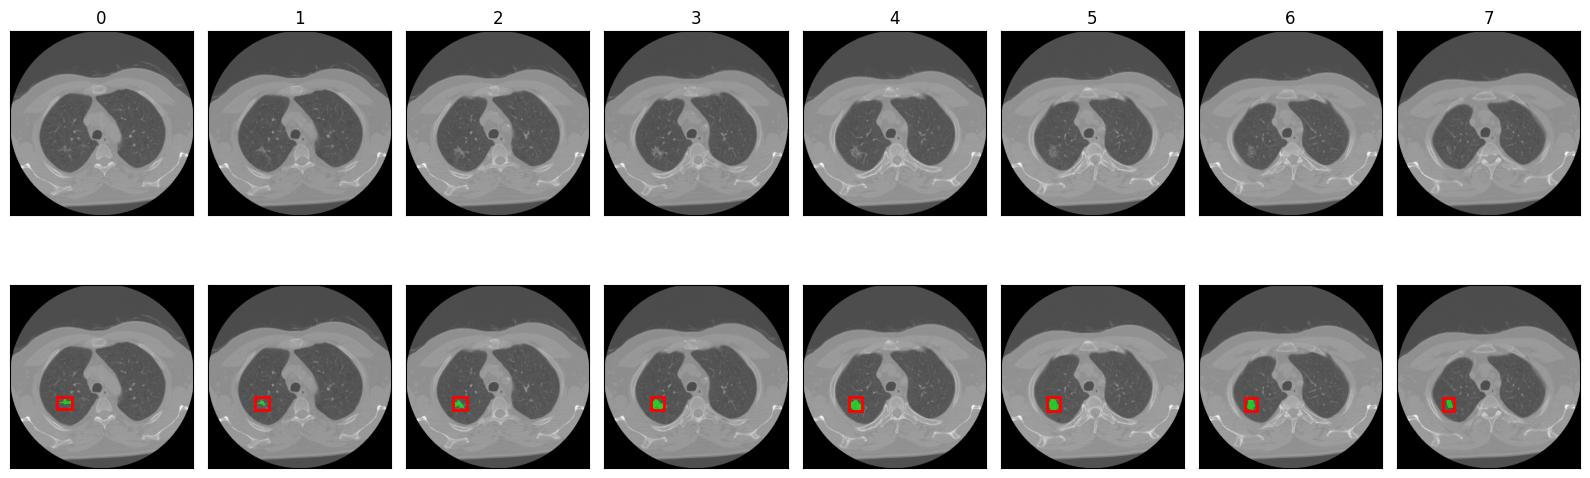

In [29]:
### Plot the bounding boxes and lesion segmentations ###

num_rows = 2
num_columns = len(df_plot)

plot_lesion = 1
plot_bounding_box = 1

fig, ax = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(num_columns*2, 6), constrained_layout=True)

for n in range(0,num_columns):

  col_index = n

  # Get the referenced SOPInstanceUID
  SOPInstanceUID = df_plot['SOPInstanceUID'].values[n]
  ct_filename = df_plot['filename'].values[n]

  # Get the CT data
  dcm = pydicom.dcmread(ct_filename)
  img = dcm.pixel_array

  # Plot the CT image
  ax[0,col_index].imshow(img, cmap='gray')
  ax[0,col_index].get_xaxis().set_visible(False)
  ax[0,col_index].get_yaxis().set_visible(False)
  ax[0,col_index].set_title(str(n))

  # Set the value of 'plot_lesion' and 'plot_bounding_box'
  if np.isnan(df_plot['mask_slice'].values[n]):
    plot_lesion = 0
  else:
    plot_lesion = 1
  if np.isnan(df_plot['width'].values[n]):
    plot_bounding_box = 0
  else:
    plot_bounding_box = 1

  if (plot_lesion):
    # Row for the CT image + nodule
    row_index = 1
    ax[row_index,col_index].imshow(img, cmap='gray')
    ax[row_index,col_index].get_xaxis().set_visible(False)
    ax[row_index,col_index].get_yaxis().set_visible(False)
    # Add the tumor segmentation for now
    # Add the segmentation to the plot
    # mask_slice = mask_data[n,:,:]
    mask_slice = mask_data[df_plot['mask_slice'].values[n]] # the index might be different

    # ax[row_index,col_index].imshow(mask_slice, cmap='Reds', alpha=0.3)
    overlay = np.zeros((*mask_slice.shape, 4))
    # overlay[mask_slice > 0] = (*plt.cm.get_cmap('Blues')(1)[:3], 0.3)  # RGB + alpha
    overlay[mask_slice > 0] = (0, 1, 0, 0.6)  # RGB + alpha
    ax[row_index,col_index].imshow(overlay)

  if (plot_bounding_box):
    xmin = df_plot['x0'].values[n]
    ymin = df_plot['y0'].values[n]
    width = df_plot['width'].values[n]
    height = df_plot['height'].values[n]
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor='red', facecolor='none', linewidth=2)
    ax[row_index,col_index].add_patch(rect)


plt.tight_layout()
plt.show()


# Download, read, and parse a measurements SR file from NLSTSeg

## Download a single SR from IDC bucket

In [33]:
# Let's query and get the shape measurements file for the same lesion as above

query = f"""
      SELECT DISTINCT
        SeriesDescription,
        series_gcs_url
      FROM
        `bigquery-public-data.idc_v23.dicom_all`
      WHERE
        analysis_result_id = 'NLSTSeg' AND
        Modality = 'SR' AND
        # sourceSegmentedSeriesUID = @CT_SeriesInstanceUID
        dicom_all.CurrentRequestedProcedureEvidenceSequence[OFFSET(0)].ReferencedSeriesSequence[OFFSET(0)].SeriesInstanceUID = @CT_SeriesInstanceUID

      """
job_config = bigquery.QueryJobConfig(query_parameters=[bigquery.ScalarQueryParameter("CT_SeriesInstanceUID", "STRING", CT_SeriesInstanceUID)])
df_sr_features = client_bq.query(query, job_config=job_config).to_dataframe()


BadRequest: 400 Unrecognized name: sourceSegmentedSeriesUID at [10:9]; reason: invalidQuery, location: query, message: Unrecognized name: sourceSegmentedSeriesUID at [10:9]

Location: US
Job ID: eac1315d-4d7e-4b42-9ca8-98d180352a1b


In [31]:
df_sr_features

,SeriesDescription,series_gcs_url
0,NLSTSeg shape Measurements of series 2,gs://idc-open-data/fa26f617-7051-472d-b276-d77...
1,NLSTSeg firstorder Measurements of series 2,gs://idc-open-data/81de6996-938c-4e3a-b37d-f09...
2,NLSTSeg shape Measurements of series 6,gs://idc-open-data/fa97d50b-1b3b-4a9b-84e8-525...
3,NLSTSeg firstorder Measurements of series 2,gs://idc-open-data/0e835403-6d38-4587-b2c2-20a...
4,NLSTSeg shape Measurements of series 1,gs://idc-open-data/2ff60abe-9e92-44dc-9749-a98...
...,...,...
1197,NLSTSeg shape Measurements of series 7057,gs://idc-open-data/623ab71c-8be2-47c9-a406-eb1...
1198,NLSTSeg firstorder Measurements of series 4,gs://idc-open-data/05a1d1a8-8975-47f7-8829-a67...
1199,NLSTSeg shape Measurements of series 4,gs://idc-open-data/2dbb4ab8-c111-4650-b4d2-dd1...
1200,NLSTSeg firstorder Measurements of series 2,gs://idc-open-data/d5a06a9f-83cc-4da9-9ea6-ec4...


In [ ]:
# Download a SR that holds shape features, and another one that holds the first-order features
# For now we copy from bucket

sr_first_order_filename_bucket = os.path.join("gs://nlstseg_seg_and_sr/sr_first_order", SeriesInstanceUID_CT + "_sr.dcm")
sr_first_order_filename = "/content/sr_first_order.dcm"
!gsutil cp $sr_first_order_filename_bucket $sr_first_order_filename

sr_shape_filename_bucket = os.path.join("gs://nlstseg_seg_and_sr/sr_shape", SeriesInstanceUID_CT + "_sr.dcm")
sr_shape_filename = "/content/sr_shape.dcm"
!gsutil cp $sr_shape_filename_bucket $sr_shape_filename

Copying gs://nlstseg_seg_and_sr/sr_first_order/1.2.840.113654.2.55.101995309829064050675770434766964356695_sr.dcm...
/ [1 files][111.4 KiB/111.4 KiB]                                                
Operation completed over 1 objects/111.4 KiB.                                    
Copying gs://nlstseg_seg_and_sr/sr_shape/1.2.840.113654.2.55.101995309829064050675770434766964356695_sr.dcm...
/ [1 files][113.0 KiB/113.0 KiB]                                                
Operation completed over 1 objects/113.0 KiB.                                    


## Read the SR using dcmqi

In [ ]:
# Read the first order SR
!tid1500reader --inputDICOM $sr_first_order_filename --outputMetadata "/content/sr_first_order.json"

# Let's print out the metadata
with open("/content/sr_first_order.json", 'r') as file:
  sr_first_order_data = json.load(file)
sr_first_order_data_pretty = json.dumps(sr_first_order_data, indent=2)
print(sr_first_order_data_pretty)

dcmqi repository URL: https://github.com/QIICR/dcmqi revision: 4e5b700 tag: v1.4.0
{
  "CompletionFlag": "COMPLETE",
  "InstanceNumber": "1",
  "Measurements": [
    {
      "Finding": {
        "CodeMeaning": "Morphologically Altered Structure",
        "CodeValue": "49755003",
        "CodingSchemeDesignator": "SCT"
      },
      "FindingSite": {
        "CodeMeaning": "Small cell carcinoma",
        "CodeValue": "8041",
        "CodingSchemeDesignator": "ICD-03"
      },
      "ReferencedSegment": 1,
      "SourceSeriesForImageSegmentation": "1.2.840.113654.2.55.101995309829064050675770434766964356695",
      "TrackingIdentifier": "Measurements group 1",
      "TrackingUniqueIdentifier": "1.3.6.1.4.1.43046.3.1.4.481037312.243200.1758227055.769164",
      "activitySession": "1",
      "measurementAlgorithmIdentification": {
        "AlgorithmName": "pyradiomics",
        "AlgorithmVersion": "3.1.1.dev111+g8ed579383"
      },
      "measurementItems": [
        {
          "quantity"

In [ ]:
# Read the shape SR
!tid1500reader --inputDICOM $sr_shape_filename --outputMetadata "/content/sr_shape.json"

# Let's print out the metadata
with open("/content/sr_shape.json", 'r') as file:
  sr_shape_data = json.load(file)
sr_shape_data_pretty = json.dumps(sr_shape_data, indent=2)
print(sr_shape_data_pretty)

dcmqi repository URL: https://github.com/QIICR/dcmqi revision: 4e5b700 tag: v1.4.0
{
  "CompletionFlag": "COMPLETE",
  "InstanceNumber": "1",
  "Measurements": [
    {
      "Finding": {
        "CodeMeaning": "Morphologically Altered Structure",
        "CodeValue": "49755003",
        "CodingSchemeDesignator": "SCT"
      },
      "FindingSite": {
        "CodeMeaning": "Small cell carcinoma",
        "CodeValue": "8041",
        "CodingSchemeDesignator": "ICD-03"
      },
      "ReferencedSegment": 1,
      "SourceSeriesForImageSegmentation": "1.2.840.113654.2.55.101995309829064050675770434766964356695",
      "TrackingIdentifier": "Measurements group 1",
      "TrackingUniqueIdentifier": "1.3.6.1.4.1.43046.3.1.4.481037312.243201.1758227056.996601",
      "activitySession": "1",
      "measurementAlgorithmIdentification": {
        "AlgorithmName": "pyradiomics",
        "AlgorithmVersion": "3.1.1.dev111+g8ed579383"
      },
      "measurementItems": [
        {
          "quantity"

## Read the SR using highdicom

In [ ]:
def get_finding_sites(container):
    """Extract finding sites from a ContainerContentItem."""
    sites = []
    for item in container.ContentSequence:
        if "ConceptNameCodeSequence" in item:
            cn = item.ConceptNameCodeSequence[0]
            if cn.CodeMeaning == "Finding Site":   # or match CodeValue == "363698007"
                cc = item.ConceptCodeSequence[0]
                sites.append({
                    "CodeValue": cc.CodeValue,
                    "CodingSchemeDesignator": cc.CodingSchemeDesignator,
                    "CodeMeaning": cc.CodeMeaning
                })
    return sites

In [ ]:
# Read the first order SR

sr = hd.sr.srread("/content/sr_first_order.dcm")

# First get the finding site
mg_container = sr.content.get_volumetric_roi_measurement_groups()[0][0]
sites = get_finding_sites(mg_container)
print('FindingSite: ' + str(sites))

# Accessing the "content" property gives you the content of the document as
# hd.sr.MeasurementReport object, which has various useful methods attached to it.
# See https://highdicom.readthedocs.io/en/latest/package.html#highdicom.sr.MeasurementReport
content = sr.content
assert isinstance(content, hd.sr.MeasurementReport)

# This particular SR has some volumetric ROI measurement groups, and we can
# get a list of them with the "get_volumetric_roi_measurement_groups" method.
# See https://highdicom.readthedocs.io/en/latest/package.html#highdicom.sr.MeasurementReport.get_volumetric_roi_measurement_groups
# The return value is a list of hd.highdicom.sr.VolumetricROIMeasurementsAndQualitativeEvaluations objects
# See https://highdicom.readthedocs.io/en/latest/package.html#highdicom.sr.VolumetricROIMeasurementsAndQualitativeEvaluations
all_groups = content.get_volumetric_roi_measurement_groups()
num_groups = len(all_groups)

group = sr.content.get_volumetric_roi_measurement_groups()[0]
ref_seg_sop_id = group.referenced_segment.referenced_sop_instance_uid

feature_name_values = []
feature_name_schemes = []
feature_name_meanings = []

feature_unit_values = []
feature_unit_schemes = []
feature_unit_meanings = []

values = []
ref_seg_sop_ids = []

features_sr_df = pd.DataFrame()

measurements = group.get_measurements()
num_measurements = len(measurements)
for n in range(0,num_measurements):
  measurement = measurements[n]
  feature_name_values.append(measurement.name.value)
  feature_name_schemes.append(measurement.name.scheme_designator)
  feature_name_meanings.append(measurement.name.meaning)
  feature_unit_values.append(measurement.unit.value)
  feature_unit_schemes.append(measurement.unit.scheme_designator)
  feature_unit_meanings.append(measurement.unit.meaning)
  values.append(measurement.value)
  ref_seg_sop_ids.append(ref_seg_sop_id)

# Form dataframe
features_sr_df['feature_name_value'] = feature_name_values
features_sr_df['feature_name_code'] = feature_name_schemes
features_sr_df['feature_name_meaning'] = feature_name_meanings
features_sr_df['feature_unit_value'] = feature_unit_values
features_sr_df['feature_unit_code'] = feature_unit_schemes
features_sr_df['features_unit_meaning'] = feature_unit_meanings
features_sr_df['value'] = values
features_sr_df['ref_sop_id'] = ref_seg_sop_ids

features_sr_df

FindingSite: [{'CodeValue': '8041', 'CodingSchemeDesignator': 'ICD-03', 'CodeMeaning': 'Small cell carcinoma'}]


,feature_name_value,feature_name_code,feature_name_meaning,feature_unit_value,feature_unit_code,features_unit_meaning,value,ref_sop_id
0,Q3CK,IBSI,Elongation,1,UCUM,no units,0.465,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
1,N17B,IBSI,Flatness,1,UCUM,no units,0.403,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
2,7J51,IBSI,Least Axis in 3D Length,mm,UCUM,millimeter,13.803,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
3,TDIC,IBSI,Major Axis in 3D Length,mm,UCUM,millimeter,34.214,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
4,L0JK,IBSI,Maximum 3D Diameter of a Mesh,mm,UCUM,millimeter,38.324,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
5,RNU0,IBSI,Volume of Mesh,mm3,UCUM,cubic millimeter,4595.931,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
6,P9VJ,IBSI,Minor Axis in 3D Length,mm,UCUM,millimeter,15.920,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
7,QCFX,IBSI,Sphericity,1,UCUM,no units,0.656,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
8,C0JK,IBSI,Surface Area of Mesh,mm2,UCUM,square millimeter,2038.650,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
9,2PR5,IBSI,Surface to Volume Ratio,/mm,UCUM,per millimeter,0.444,1.2.276.0.7230010.3.1.4.481037312.242958.17582...


In [ ]:
# Read the shape SR

sr = hd.sr.srread("/content/sr_shape.dcm")

# First get the finding site
mg_container = sr.content.get_volumetric_roi_measurement_groups()[0][0]
sites = get_finding_sites(mg_container)
print('FindingSite: ' + str(sites))

# Accessing the "content" property gives you the content of the document as
# hd.sr.MeasurementReport object, which has various useful methods attached to it.
# See https://highdicom.readthedocs.io/en/latest/package.html#highdicom.sr.MeasurementReport
content = sr.content
assert isinstance(content, hd.sr.MeasurementReport)

# This particular SR has some volumetric ROI measurement groups, and we can
# get a list of them with the "get_volumetric_roi_measurement_groups" method.
# See https://highdicom.readthedocs.io/en/latest/package.html#highdicom.sr.MeasurementReport.get_volumetric_roi_measurement_groups
# The return value is a list of hd.highdicom.sr.VolumetricROIMeasurementsAndQualitativeEvaluations objects
# See https://highdicom.readthedocs.io/en/latest/package.html#highdicom.sr.VolumetricROIMeasurementsAndQualitativeEvaluations
all_groups = content.get_volumetric_roi_measurement_groups()
num_groups = len(all_groups)

group = sr.content.get_volumetric_roi_measurement_groups()[0]
ref_seg_sop_id = group.referenced_segment.referenced_sop_instance_uid

feature_name_values = []
feature_name_schemes = []
feature_name_meanings = []

feature_unit_values = []
feature_unit_schemes = []
feature_unit_meanings = []

values = []
ref_seg_sop_ids = []

features_sr_df = pd.DataFrame()

measurements = group.get_measurements()
num_measurements = len(measurements)
for n in range(0,num_measurements):
  measurement = measurements[n]
  feature_name_values.append(measurement.name.value)
  feature_name_schemes.append(measurement.name.scheme_designator)
  feature_name_meanings.append(measurement.name.meaning)
  feature_unit_values.append(measurement.unit.value)
  feature_unit_schemes.append(measurement.unit.scheme_designator)
  feature_unit_meanings.append(measurement.unit.meaning)
  values.append(measurement.value)
  ref_seg_sop_ids.append(ref_seg_sop_id)

# Form dataframe
features_sr_df['feature_name_value'] = feature_name_values
features_sr_df['feature_name_code'] = feature_name_schemes
features_sr_df['feature_name_meaning'] = feature_name_meanings
features_sr_df['feature_unit_value'] = feature_unit_values
features_sr_df['feature_unit_code'] = feature_unit_schemes
features_sr_df['features_unit_meaning'] = feature_unit_meanings
features_sr_df['value'] = values
features_sr_df['ref_sop_id'] = ref_seg_sop_ids

features_sr_df



FindingSite: [{'CodeValue': '8041', 'CodingSchemeDesignator': 'ICD-03', 'CodeMeaning': 'Small cell carcinoma'}]


,feature_name_value,feature_name_code,feature_name_meaning,feature_unit_value,feature_unit_code,features_unit_meaning,value,ref_sop_id
0,QG58,IBSI,10th percentile,[hnsf'U],UCUM,Hounsfield Unit,-2.998000e+02,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
1,8DWT,IBSI,90th percentile,[hnsf'U],UCUM,Hounsfield Unit,8.200000e+01,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
2,N8CA,IBSI,Energy,[hnsf'U]2,UCUM,square Hounsfield Unit,1.424849e+08,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
3,TLU2,IBSI,Intensity Histogram Entropy,1,UCUM,no units,3.812000e+00,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
4,SALO,IBSI,Interquartile range,[hnsf'U],UCUM,Hounsfield Unit,1.405000e+02,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
5,84IY,IBSI,Maximum grey level,[hnsf'U],UCUM,Hounsfield Unit,1.490000e+02,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
6,4FUA,IBSI,Mean absolute deviation,[hnsf'U],UCUM,Hounsfield Unit,1.177130e+02,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
7,Q4LE,IBSI,Mean,[hnsf'U],UCUM,Hounsfield Unit,-3.489300e+01,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
8,Y12H,IBSI,Median,[hnsf'U],UCUM,Hounsfield Unit,3.100000e+01,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
9,1GSF,IBSI,Minimum grey level,[hnsf'U],UCUM,Hounsfield Unit,-5.000000e+02,1.2.276.0.7230010.3.1.4.481037312.242958.17582...
